# Submission 3 - Final

**Instructions**
- Fill out the 'Basic Information','Complex Hypotheses - Findings / Insights', 'Black vs White Hat Visualization' sections (replace the TODOs with your information)
  - If your visualization is interactive, create a short video that shows the interactivity (max. 3 min).
- Export the Jupyter notebook as a HTML file and save it in this repository.
  - Go to 'File' -> 'Save and Export Notebook As..' -> 'HTML'.
  - Save it locally in your project folder. You can leave the name as it is.
  - If you have a video, then add it to the project folder.
  - Push your local changes to the GitHub repository.
- Make sure all your files are up-to-date (pushed) in the Github repository.
  - Check if all Jupyter notebooks are executeable, theses will be the backup if there were problems with the HTML file submissions.
  - We will collect the protect via GitHub Classroom.

---
## Basic Information

**Team Name:** VitaminD

**Team Members:**
- k08925980 - Josef Schodl
- k12114346 - Nikola Badjevic
- k01608113 - Hao Zheng
- k12102933 - Hector Auvinen

**Dataset Description:**  
(max. 75 words)

<font size="3">The dataset shows dating behavior gathered from a Speed Dating experiment at a university where the authors hosted multiple dating events.  Furthermore, participants were surveyed about their demographic information, dating behavior, hobbies and what they look for in a partner. Each row presents a date between a participant, a partner, what attributes are important for them and their decisions. Our dataset has a mix of quantitative, ordinal and nominal data.</font>

---
## Complex Hypotheses - Findings / Insights

**Instructions:**
- Add your visualizations (**max. 4**) here
  - The visualizations should show the findings / insights
- Add the descriptions for all your findings / insights (**max. 150 words**)
  - The description should also relate to the visualizations above.

### Visualizations

In [1]:
# Import libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt
from ipywidgets import widgets
from ipywidgets import interact, interact_manual

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from sklearn import manifold
from wordcloud import WordCloud


In [2]:
# load data
data = pd.read_csv("../data/Speed_Dating_Data.csv",encoding="iso-8859-1")
# get all columns
all_columns = (list(data.columns.values))

<font size="3">Some visualizations might not be rendered correctly if the notebook is only viewed in the github repository.
We put screenshots of them in the `screenshot` folder, they are named according to their visualization number, e.g. <i>submission_03_visualization_1.png</i> <br>
Additionally, we also display the screenshots in the notebooks, so they are also visible in the HTML.</font>


<h3>Complex Hypotheses</h3>
<font size="3"> <br>
1. Business students' favorite activities are sports and clubbing, and they like go out often while engineering students' favorite activies are gaming and they rarely go out.

In [3]:
filtered_data = data[["date","go_out", "field_cd", "sports", "tvsports", "exercise", "dining", "museums", "art","hiking", "gaming", "clubbing", "reading", "tv", "theater", "movies",
                      "concerts", "music", "shopping", "yoga"]].copy()
filtered_data.drop_duplicates(inplace=True)


The field of study is encoded in different numbers, the mentioned groups of students in our hypotheses have the following codes:
- 3 = Social Science, Psychologist
- 5 = Engineering
- 8 = Business/Econ/Finance
- 15 =Fine Arts/Arts Administration

In [4]:
#How interested are you in the following activities, on a scale of 1-10?# 
# field_c: business = 8, engineering = 5 
correct_codes = [5, 8]

filtered_data = filtered_data[filtered_data['field_cd'].isin(correct_codes)].copy()
filtered_data = filtered_data.fillna(0)
filtered_data

filtered_data_bus_eng = filtered_data.loc[(filtered_data['field_cd']==5) | (filtered_data['field_cd'] == 8)].copy()
filtered_data_bus_eng


,date,go_out,field_cd,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga
100,5.0,4.0,8.0,8.0,7.0,2.0,6.0,7.0,5.0,5.0,5.0,4.0,9.0,2.0,4.0,8.0,7.0,8.0,5.0,1.0
150,5.0,1.0,8.0,7.0,2.0,6.0,7.0,7.0,7.0,5.0,5.0,5.0,8.0,3.0,7.0,8.0,7.0,8.0,6.0,1.0
170,6.0,1.0,8.0,5.0,5.0,5.0,9.0,4.0,3.0,4.0,4.0,2.0,6.0,9.0,3.0,9.0,3.0,6.0,2.0,1.0
180,1.0,1.0,8.0,10.0,10.0,10.0,10.0,5.0,5.0,6.0,7.0,9.0,8.0,1.0,1.0,7.0,7.0,7.0,7.0,10.0
190,1.0,1.0,8.0,10.0,10.0,10.0,10.0,9.0,9.0,4.0,10.0,10.0,8.0,3.0,8.0,8.0,6.0,6.0,5.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8246,3.0,1.0,8.0,9.0,6.0,9.0,7.0,8.0,8.0,2.0,2.0,8.0,9.0,4.0,9.0,8.0,9.0,9.0,6.0,5.0
8268,6.0,1.0,8.0,10.0,8.0,4.0,10.0,3.0,2.0,2.0,5.0,1.0,9.0,6.0,4.0,6.0,7.0,10.0,4.0,1.0
8290,7.0,1.0,8.0,8.0,5.0,6.0,9.0,7.0,7.0,4.0,8.0,8.0,7.0,7.0,8.0,8.0,10.0,10.0,8.0,2.0
8312,4.0,1.0,8.0,5.0,3.0,5.0,9.0,7.0,8.0,3.0,3.0,8.0,8.0,3.0,7.0,7.0,4.0,6.0,6.0,3.0


We use <b>Multidimensional scaling</b> reduce the number of dimensions to be able to visualize the students in one 2D plot based on their interest in the 17 activities/hobbies and to see if any similarities/differences between business and engineering students can be observed.

In [5]:
# Use Multidimensional scaling to visualize if similarities/differences in the activites of the student groups exist

#create mds instance
MDS = manifold.MDS(n_components=2, random_state=5)

#fit the model and get the embedded coordinates
coordinates = MDS.fit_transform(filtered_data_bus_eng.iloc[:,3:])
filtered_data_bus_eng['MDS_x']= coordinates[:, 0]
filtered_data_bus_eng['MDS_y']= coordinates[:, 1]

# replcae study code with name
filtered_data_bus_eng.loc[filtered_data_bus_eng['field_cd'] == 5,"field_cd"] = "Engineering students"
filtered_data_bus_eng.loc[filtered_data_bus_eng['field_cd'] == 8,"field_cd" ] = "Business students"


In [6]:
filtered_data_bus_eng["field_cd"].value_counts()

Business students       130
Engineering students     56
Name: field_cd, dtype: int64

In [7]:

# Making two lists for
# values and colors resp.
dom = ["Engineering students","Business students"]
rng = ['#957DAD', '#8DD1F1']

chart = alt.Chart(filtered_data_bus_eng).mark_point().encode(
    alt.X('MDS_x'),
    alt.Y('MDS_y'),
    #color='field_cd:N'
    color=alt.Color('field_cd', scale=alt.Scale(domain=dom, range=rng))
).properties(title="Activities of Business & Engineering Students (afer MDS)")

print("Visualization 1")
chart

Visualization 1


/home/hao/anaconda3/envs/python-tutorial/lib/python3.10/site-packages/altair/utils/core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.Chart(...)

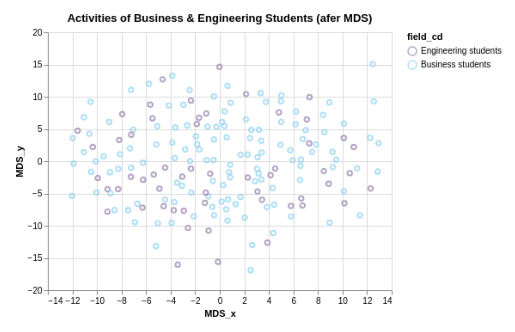

In [8]:
# in case the altair doesn't show up in the Notebook/HTML
visualization_1 = plt.imread('../screenshot/submission_03_visualization_1.png')
plt.axis("off")
plt.imshow(visualization_1)


In [9]:
eng_activities = filtered_data[filtered_data["field_cd"] == 5].copy()
eng_activities.drop(columns="go_out", inplace=True)

business_activities = filtered_data[filtered_data["field_cd"] == 8].copy()
business_activities.drop(columns="go_out", inplace=True)


In [10]:
# show only top x activities of student groups

all_activities_means = filtered_data.groupby(["field_cd"]).mean()
display(all_activities_means.head())
all_activities_means.drop(columns=["go_out", "date"], inplace=True)


activities = list(all_activities_means.columns)
#activities

all_activities_means = all_activities_means.transpose()
business_activities = all_activities_means[8]
eng_activities = all_activities_means[5]
business_activities = pd.DataFrame(business_activities)
business_activities.rename(columns={8:"business"}, inplace=True)
business_activities.sort_values("business", ascending=False,inplace=True)
eng_activities = pd.DataFrame(eng_activities)
eng_activities.index
eng_activities.rename(columns={5:"engineering"}, inplace=True)
eng_activities.sort_values("engineering", ascending=False,inplace=True)
eng_activities_all = eng_activities.copy()
business_activities_all = business_activities.copy()

,date,go_out,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga
field_cd,,,,,,,,,,,,,,,,,,,
5.0,5.392857,2.517857,6.910714,5.089286,6.071429,7.571429,6.607143,6.500000,6.285714,5.125000,6.071429,6.660714,5.142857,6.142857,7.642857,6.839286,7.678571,5.285714,4.053571
8.0,4.484615,1.738462,7.292308,5.138462,6.484615,7.792308,6.461538,6.038462,5.315385,4.207692,5.953846,7.492308,5.046154,6.192308,7.523077,6.315385,7.461538,5.115385,3.930769


<font size="3">We created a video <i>submission_03_interactive_plot_recording.mp4 </i> in the submission folder, which shows the interactive dropdown and slider in this visualization. Below there are also some screenshots, so that the visualization is also visible in the HTML.</font>

In [11]:
# interactive plot
#slider = widgets.BoundedFloatText(5,min=0,max=len(list(business.index)), description='Top Activities')

print("Visualization 2")

@interact(categories=['business', "engineering"],  top_activities=(5, len(list(eng_activities.index))))
def plot_one(categories, top_activities):
    
    c_palette = {"business":"#957DAD", "engineering": "#8DD1F1"}
    fig, ax = plt.subplots(figsize=(8, 6))
    print(top_activities)
    width = 0.4
    if categories == "business":
        temp_data = business_activities.iloc[:top_activities,:].copy()
        x = np.arange(len(temp_data.index))
        #temp_data = business
        top_x_activities = list(temp_data.index)
        rects = ax.barh(x - width/2, temp_data["business"], width, label='Business Students', color = c_palette[categories])
        #957DAD
    elif categories == "engineering":
        temp_data = eng_activities.iloc[:top_activities,:].copy()
        x = np.arange(len(temp_data.index))
        #temp_data = business
        top_x_activities = list(temp_data.index)
        

        rects = ax.barh(x - width/2, temp_data["engineering"], width, label='Engineering Students', color = c_palette[categories])
        #8DD1F1
    plt.xticks(np.arange(0, 10, step=1))
    #plt.vlines(x,ymin=0, ymax=top_activities+1, color="white")
    ax.set_xlabel('Average Rating')
    ax.set_ylabel('Activity')
    ax.set_title(f'Top {top_activities} Activities/Interests of Students')
    ax.set_yticks(x, top_x_activities)
    xcoords = [1,2,3]
    for xc in range(1,10):
        plt.axvline(x=xc, color ="white")
    ax.legend(loc='lower right')
    
    #ax.bar_label( padding=3)
    plt.gca().invert_yaxis()
    plt.show()
    
    chart = alt.Chart(filtered_data_bus_eng).mark_point().encode(
    alt.X('MDS_x'),
    alt.Y('MDS_y'),
    color='field_cd:N'
    ).properties(title="Activities of Business & Engineering Students (afer MDS)")
    chart
    
    


Visualization 2


interactive(children=(Dropdown(description='categories', options=('business', 'engineering'), value='business'…

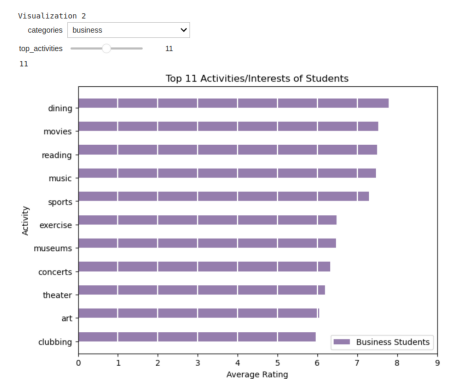

In [12]:
# in case the plot doesn't render in the Notebook/HTML
visualization_2a = plt.imread('../screenshot/submission_03_visualization_2a.png')
plt.axis("off")
plt.imshow(visualization_2a)


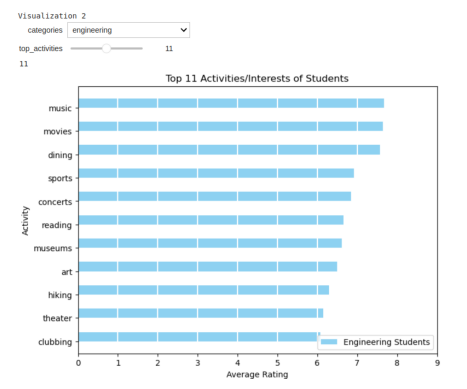

In [13]:
# in case the plot doesn't render in the Notebook/HTML
visualization_2b = plt.imread('../screenshot/submission_03_visualization_2b.png')
plt.axis("off")
plt.imshow(visualization_2b)


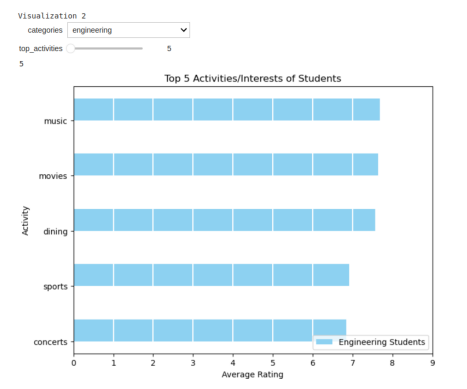

In [14]:
# in case the plot doesn't render in the Notebook/HTML
visualization_2c = plt.imread('../screenshot/submission_03_visualization_2c.png')
plt.axis("off")
plt.imshow(visualization_2c)


<font size="3">Now, we check out the second part of the hypothesis which deals with the outgoingness of the students in the speed dating event.</font>

In [15]:
# find two most popular activities of both student groups, mean rating
# find the outgoing level
'''How often do you go out (not necessarily on dates)?/ In general, how frequently do you go on dates?
Several times a week=1
Twice a week=2
Once a week=3
Twice a month=4
Once a month=5
Several times a year=6
Almost never=7'''

eng_go_out = filtered_data[filtered_data["field_cd"] == 5].copy()
business_going_out = filtered_data[filtered_data["field_cd"] == 8].copy()


In [16]:
business_go = pd.DataFrame(business_going_out["go_out"].value_counts())


eng_go =  pd.DataFrame(eng_go_out["go_out"].value_counts())
eng_go.sort_index(inplace=True)
# display(business_go)
# eng_go

Visualization 3


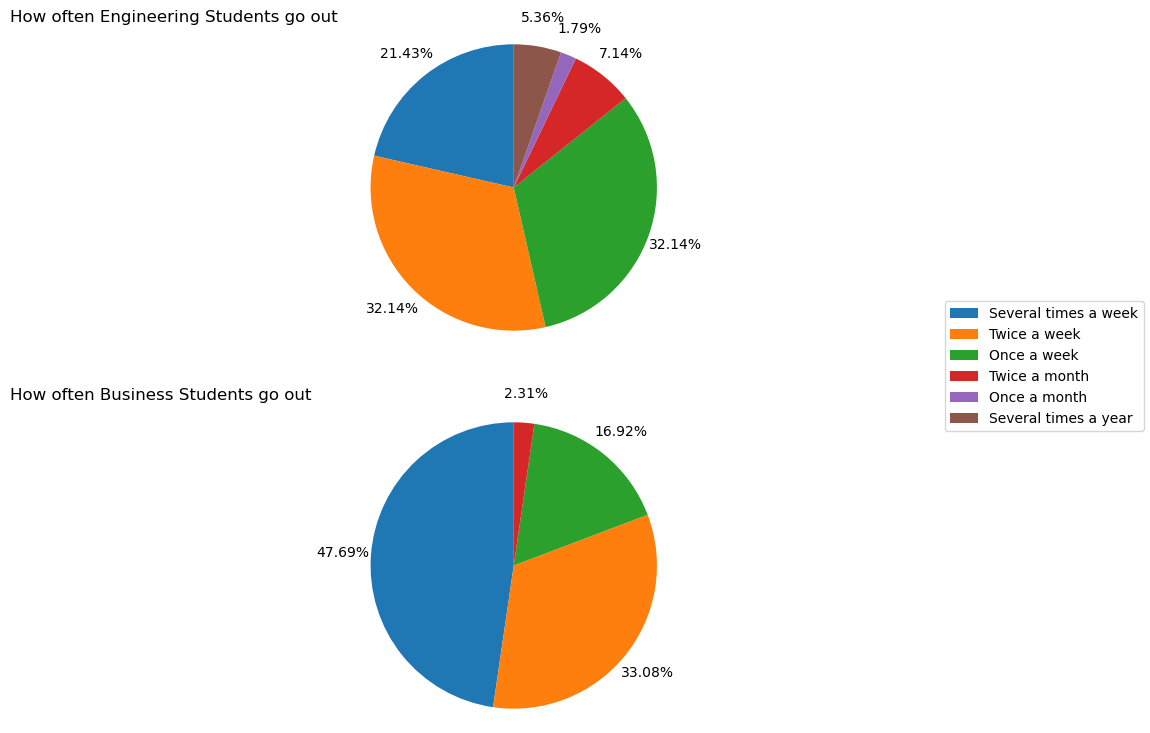

In [17]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:

label_dict = {1:"Several times a week",
    2:"Twice a week",
    3:"Once a week",
    4:"Twice a month",
    5:"Once a month",
    6:"Several times a year",
    7:"Almost never"}

labels = [label_dict[i] for i in eng_go.index]
              
#print(labels)    

print("Visualization 3")

sizes = eng_go["go_out"]
explode = (0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, (ax1, ax2) = plt.subplots(2, figsize=(13,9))
ax1.pie(sizes, labels=["" for i in range(len(labels))], autopct='%1.2f%%',
        shadow=False, startangle=90, pctdistance=1.2)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("How often Engineering Students go out", loc="left")
fig1.legend(labels=labels, loc="center right")

## 2nd plot

sizes = business_go["go_out"]
labels = [label_dict[i] for i in business_go.index]

ax2.pie(sizes, labels=["" for i in range(len(labels))], autopct='%1.2f%%',
        shadow=False, startangle=90,  pctdistance=1.2)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax2.set_title("How often Business Students go out", loc="left")

#ax2.legend(labels=labels)


plt.show()

<h3>Complex Hypotheses</h3>
<font size="3"> <br>
2. While math and engineering students mainly look for intelligence and ambition in a partner, fine arts and social science students put importance on fun and shared interests. </font>

In [18]:
# take a subset with only the relevant fields
#looking_for_data = data[["iid","id","field","field_cd",'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']]
looking_for_data = data[["iid","id","field_cd",'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']]
# we will have multiple duplicate rows for each participant so drop those
t_data = looking_for_data.drop_duplicates()

print(len(t_data.index))
t_data.head()

552


,iid,id,field_cd,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1
0,1,1.0,1.0,15.0,20.0,20.0,15.0,15.0,15.0
10,2,2.0,1.0,45.0,5.0,25.0,20.0,0.0,5.0
20,3,3.0,2.0,35.0,10.0,35.0,10.0,10.0,0.0
30,4,4.0,1.0,20.0,20.0,20.0,20.0,10.0,10.0
40,5,5.0,1.0,20.0,5.0,25.0,25.0,10.0,15.0


The field of study is encoded in different numbers, the mentioned groups of students in our hypotheses have the following codes:
- 2 = Math
- 3 = Social Science, Psychologist
- 5 = Engineering
- 15 =Fine Arts/Arts Administration

In [19]:

correct_codes = [2, 5, 3, 15]

all_students = t_data[t_data['field_cd'].isin(correct_codes)].copy()

all_students_mean = all_students.groupby(["field_cd"]).mean()
all_students_mean[['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']]

all_students_mean.rename(columns={'attr1_1':"Attractive", 'sinc1_1':"Sincere", 'intel1_1':"Intelligent", 'fun1_1':"Fun", 'amb1_1':"Ambitious", 'shar1_1':"Shared Interests"}, inplace=True)
all_students_mean = all_students_mean.iloc[:,2:]
all_students_mean

,Attractive,Sincere,Intelligent,Fun,Ambitious,Shared Interests
field_cd,,,,,,
2.0,19.232143,17.838571,21.030714,18.262143,13.810000,9.825714
3.0,21.880889,18.296889,20.973556,16.317111,10.458889,12.517111
5.0,23.306964,17.918214,19.894107,18.047273,9.796182,11.744364
15.0,17.272727,18.454545,22.090909,19.363636,9.545455,13.272727


Visualization 4


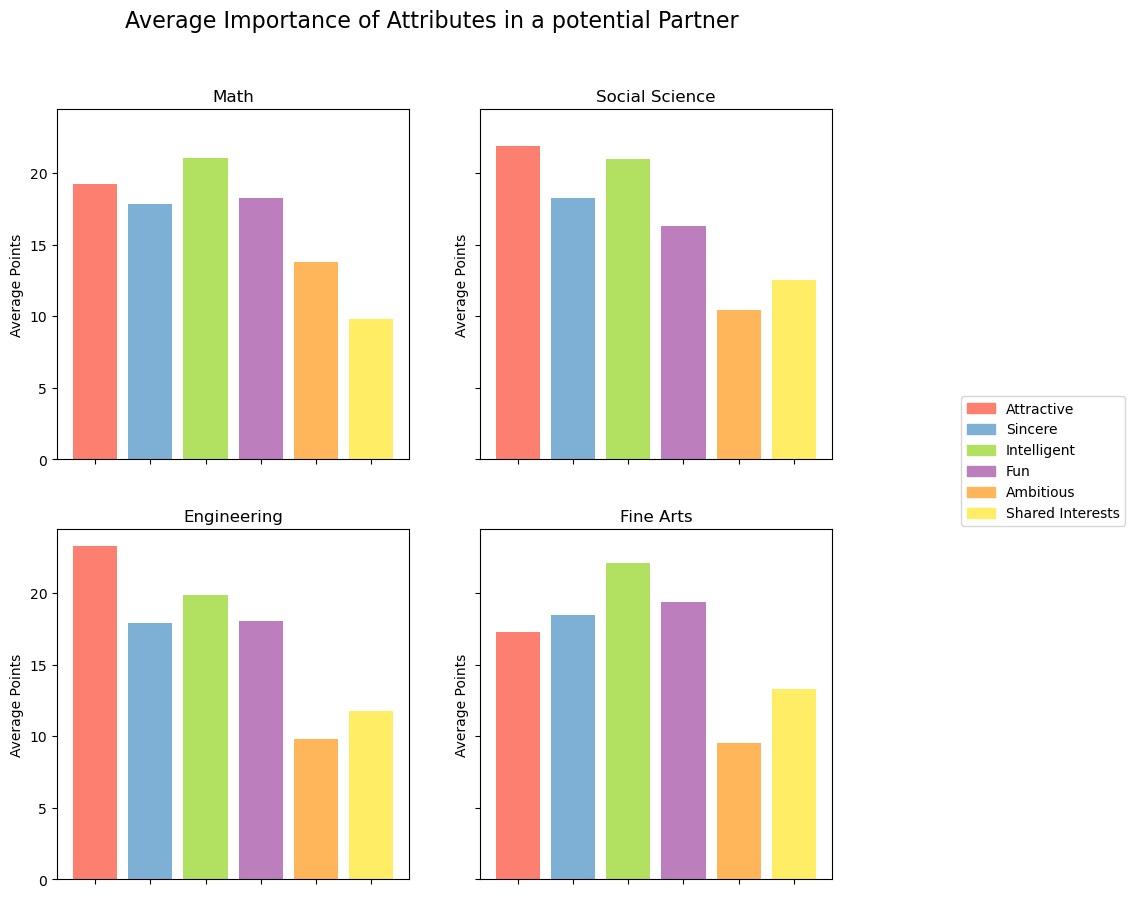

In [20]:

labels =["Attractive","Sincere","Intelligent","Fun","Ambitious","Shared Interests"]

bars = ["Attractive","Sincere","Intelligent","Fun","Ambitious","Shared Interests"]
x_pos = list(range(len(bars)))

#colors = ["#4053d3", "#ddb310", "#b51d14", "#00beff", "#fb49b0", "#00b25d"]
colors = ["#fd7f6f", "#7eb0d5", "#b2e061", "#bd7ebe", "#ffb55a", "#ffee65"]

xlabels = [" " for i in range(len(labels))]

print("Visualization 4")

fig, ax = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

ax[0,0].bar(x_pos, all_students_mean.iloc[0,:], color = colors)

ax[0,0].set_xticks(x_pos, xlabels)
ax[0,0].set_ylabel('Average Points')
ax[0,0].set_title("Math") 

# Create bars
ax[0,1].bar(x_pos, all_students_mean.iloc[1,:], color = colors)

ax[0,1].set_xticks(x_pos, xlabels)
ax[0,1].set_ylabel('Average Points')
ax[0,1].set_title("Social Science") 


ax[1,0].bar(x_pos, all_students_mean.iloc[2,:], color = colors)

ax[1,0].set_xticks(x_pos, xlabels)
ax[1,0].set_ylabel('Average Points')
ax[1,0].set_title("Engineering") 


ax[1,1].bar(x_pos, all_students_mean.iloc[3,:], color = colors)

ax[1,1].set_xticks(x_pos, xlabels)
ax[1,1].set_ylabel('Average Points')
ax[1,1].set_title("Fine Arts") 




handles = [mpatches.Patch(color=colors[i], label=labels[i]) for i in range(len(labels))]
#plt.title("Importance of Attributes in a potential Partner")
fig.suptitle('Average Importance of Attributes in a potential Partner', fontsize=16)
#fig.legend(handles=handles, loc="center right")
fig.legend(handles=handles,bbox_to_anchor=(1.2, 0.6))
# Show graphic
plt.show()



### Description(max 150 words)

<font size="3">Sports is among the top 5 activities for business and engineering students. Our assumption that gaming is popular among engineers is wrong since it is one of the least popular activity. Overall,  yoga and gaming are of less interest for both groups. The first visualization shows that the interests within each group varies and the different student groups are not isolated from each other.
Business students are more outgoing since almost half go out several times a week while only 21.43% of engineers do that. Moreover, the share of  students who go out less frequently is higher among engineers.
For the second hypothesis(visualization 4), we do not observe big difference among the student groups. Attractiveness and intelligence are the two most important except for Fine Arts students where intelligence and fun are the top 2. Interestingly, ambition and shared interests are less significant for all students.</font>


---
## Black vs White Hat Visualization

### Black Hat Visualization

**Instructions:**
- Add your black hat visualization
- Add a description explaining your motivation and design process in producing this visualization (**max. 150 words**)

#### Visualization

/tmp/ipykernel_44153/1911855625.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  e_and_m = engineers.append(math)


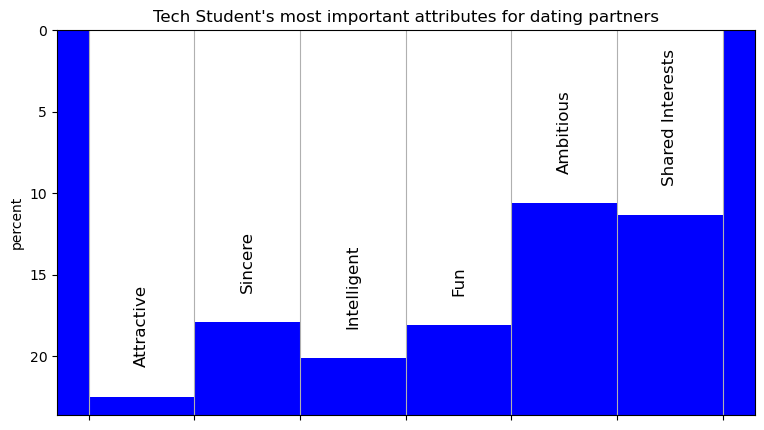

In [21]:
# select engineering (field_cd = 5) and math (field_cd = 2) students from dataset
engineers = t_data.loc[t_data['field_cd'] == 5.0]
math = t_data.loc[t_data['field_cd'] == 2.0]
e_and_m = engineers.append(math)

# create lists of labels and mean values of percentages from dataset
y = e_and_m[['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']].mean().tolist()
x = ["Attractive","Sincere","Intelligent","Fun","Ambitious","Shared Interests"]

# create matplotlib bar chart with inverted y-axis, white bars on blue background
plt.figure(figsize = (9,5))
ax = plt.axes()
ax.set_facecolor("blue")
plt.bar(x, y, color='white', width=1)
plt.gca().invert_yaxis()

# place labels inside bars
for i in range(len(x)):
    plt.text(i, y[i] - 2, x[i] , ha='center', rotation='vertical', fontsize='large')

# add title, grid
plt.title("Tech Student's most important attributes for dating partners")
plt.grid(axis='x')
plt.xticks(np.arange(-0.5, 6, step=1), [])
plt.xlabel("")
plt.ylabel("percent")

plt.show()


#### Description

<font size="3">The goal for this black hat visualization is to cover the fact that for the group of students of Engineering and Mathematics actually attractiveness is the most important attribute of their potential dating partners. We tried to make it look the opposite by inverting the y axis of the bar chart while putting the labels inside the bars of the chart, making it look like they could also be placed above the bars. Also, we made the bar chart mono colored with white bars on colored background to hide what are actually the bars and what is the background. Beyond that, we formulated an unclear chart title which leaves it open whether the attributes are meant to be the ones of the tech students or their dating partners. Overall, the viewer has to think about the order of the percentage values to identify the confusion.</ffont>

### White Hat Visualization

**Instructions:**
- Add your white hat visualization
- Add a description explaining your motivation and design process in producing this visualization (**max. 150 words**)

#### Visualization

In [22]:
data_white_hat = data[["id", "field"]].copy()

# data_white_hat.drop(columns=["iid", "id", "order", "partner", "pid", "positin1"], inplace=True)
data_white_hat.drop_duplicates(inplace=True)

In [23]:
#drop empty values from the field column
data_white_hat['field'].replace('', np.nan, inplace=True)
data_white_hat.dropna(subset=['field'], inplace=True)


#data_only_field_names = data_white_hat['field'].str.upper()
#data_white_hat['field'] = data_white_hat['field'].str.strip()
#data_white_hat['field'] = data_white_hat.field.str.strip()

data_only_field_names = data_white_hat['field'].str.strip()

data_only_field_names = data_white_hat['field'].str.replace(" ","_")
#data_only_field_names = data_only_field_names.apply(strip())


data_only_field_names = data_only_field_names.str.upper()
data_only_field_names = data_only_field_names.str.strip("_")

In [24]:
# changing the dataframe to a list
new_data = data_only_field_names.values.tolist()
# using list comprehension
new_data1 = ' '.join([str(elem) for elem in new_data])

In [25]:
word_cloud = WordCloud(max_words=100, min_word_length=3, collocations=False, width=3500, height=3500, background_color = 'white').generate(new_data1)

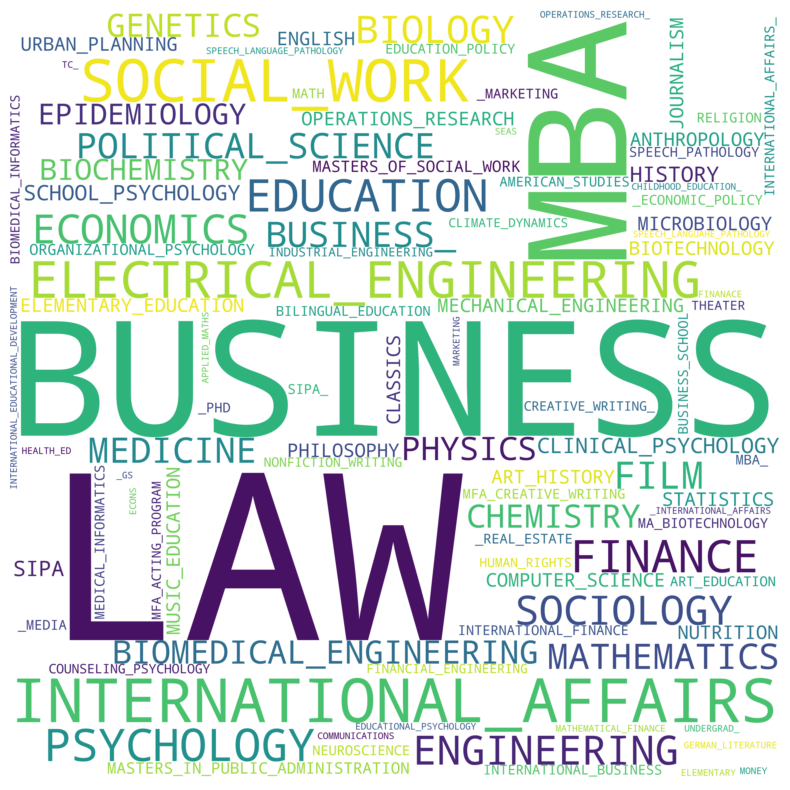

In [26]:
fig, ax = plt.subplots(figsize=(16, 10))


ax.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Description

<font size="3">Since we were curious what the students in the speed dating were studying and the total number of different studies is over 200, we decided to create a worldcloud to present the various study programs. The advantages are that it is displays the most frequently occurring studies as larger and more prominent text and it is easy to understand. First, we got rid of nan values and uppercased the names since sometimes people wrote the same study differently. The library word-cloud only accepts strings as input and not lists or other datatypes so that is why the list had to be transformed back into a string.Addtionally, the whitespace was replaced by a underscore since some studies have several words, e.g. Social Work. On the first look we can see that there are a lot of MBAs, Law and business students.</font>